In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats

In [4]:
locals().update(np.load("result_nonparametric_zero_s_eta.npz"))

# 1. Parameters

In [5]:
num_sim = Ys_sim.shape[0]
T = Ys_sim.shape[1]

In [6]:
T0 = 20
alpha = 1
K = 6.5

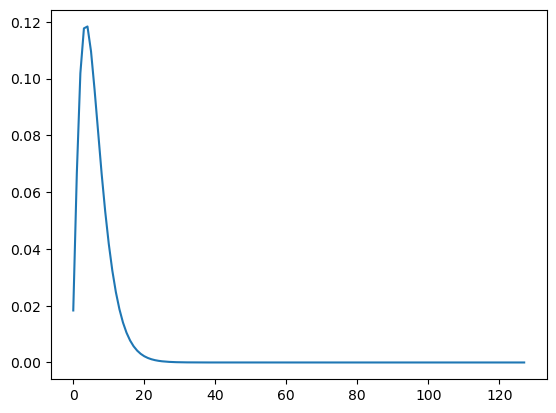

In [7]:
# g
plt.plot(g)

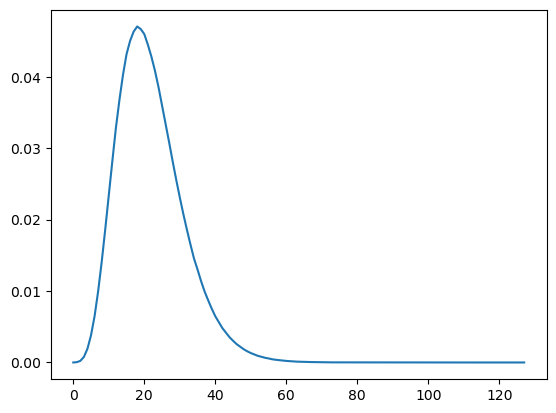

In [8]:
# pi
plt.plot(pi)

In [9]:
# A
d = A.shape[1]

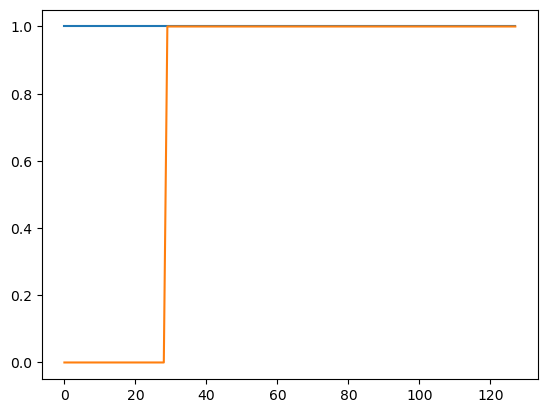

In [10]:
plt.plot(A)

# 3. Wald's Confidence Region coverage test

In [11]:
Ihs_dth = np.zeros([num_sim, 2+d, 2+d])
Ts_dth = np.zeros(num_sim)
ps_dth = np.zeros(num_sim)

In [12]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    shat_eps = ssim_eps[iter_sim,-1]
    mhat_0 = msim_0[iter_sim,-1]
    bhat = bsim[iter_sim,-1,:]
    Y_data = Ys_sim[iter_sim]
    
    Rhat = np.zeros(T+T0)
    d1Rh = np.zeros([d, T+T0])
    d2Rh = np.zeros([d, d, T+T0])
    
    for t in np.arange(T+T0):
        o = np.exp(bhat @ A[t])
        p = 1 / (1 + o)
        q = o / (1 + o)

        Rhat[t] = K * p
        d1Rh[:,t] = - K * p * q * A[t]
        d2Rh[:,:,t] = K * p * q * (q - p) * (A[t,:,None] * A[t])
        
    Pi = alpha * np.concatenate([[0],pi])[np.maximum(0, T0 + np.arange(T)[:,None] - np.arange(T+T0))]
    G = Rhat[:,None] * np.concatenate([[0],g])[np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    d1G = d1Rh[:,:,None] * np.concatenate([[0],g])[
            np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    d2G = d2Rh[...,None] * np.concatenate([[0],g])[
            np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    
    inv_ImG = la.inv(np.eye(T+T0)-G)
    Pi_inv_ImG = Pi @ inv_ImG
    
    EY = mhat_0 * Pi_inv_ImG[:,0]
    d1EY = mhat_0 * (Pi_inv_ImG @ (d1G @ inv_ImG[:,:1]))[...,0]
    d2EY = mhat_0 * (Pi_inv_ImG @ (
        d1G[:,None] @ inv_ImG @ d1G @ inv_ImG[:,:1]
        + d1G @ inv_ImG @ d1G[:,None] @ inv_ImG[:,:1]
        + d2G @ inv_ImG[:,:1]))[...,0]
    
    Ed2l_ds2 = - 2 * T / shat_eps**2
    Ed2l_dsdm = 0
    Ed2l_dsdb = np.zeros(d)
    Ed2l_dm2 = - np.sum(Pi_inv_ImG[:,0]**2) / shat_eps**2
    Ed2l_dmdb = - np.sum(Pi_inv_ImG[:,0] * d1EY, 1) / shat_eps**2
    Ed2l_db2 = - d1EY @ d1EY.T / shat_eps**2

    Ed2l_dms2 = np.array(
        [[Ed2l_dm2, Ed2l_dsdm],
         [Ed2l_dsdm, Ed2l_ds2]]
    )
    Ed2l_dmsdb = np.stack([Ed2l_dmdb, Ed2l_dsdb])

    Ihs_dth[iter_sim] = - np.block(
        [[Ed2l_dms2, Ed2l_dmsdb],
         [Ed2l_dmsdb.T, Ed2l_db2]])
    Ts_dth[iter_sim] = (bhat[1]-bmle[1])/np.sqrt(la.inv(Ihs_dth[iter_sim])[-1,-1])
    ps_dth[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_dth[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.012595 sec.
2-th simulation finished, 0.010399 sec.
3-th simulation finished, 0.004577 sec.
4-th simulation finished, 0.004329 sec.
5-th simulation finished, 0.007400 sec.
6-th simulation finished, 0.004467 sec.
7-th simulation finished, 0.009767 sec.
8-th simulation finished, 0.004337 sec.
9-th simulation finished, 0.004605 sec.
10-th simulation finished, 0.010074 sec.
11-th simulation finished, 0.004168 sec.
12-th simulation finished, 0.004036 sec.
13-th simulation finished, 0.003660 sec.
14-th simulation finished, 0.005757 sec.
15-th simulation finished, 0.004979 sec.
16-th simulation finished, 0.006955 sec.
17-th simulation finished, 0.005499 sec.
18-th simulation finished, 0.004439 sec.
19-th simulation finished, 0.007290 sec.
20-th simulation finished, 0.010115 sec.
21-th simulation finished, 0.006876 sec.
22-th simulation finished, 0.003996 sec.
23-th simulation finished, 0.003798 sec.
24-th simulation finished, 0.005260 sec.
25-th simulation finished

222-th simulation finished, 0.014826 sec.
223-th simulation finished, 0.004567 sec.
224-th simulation finished, 0.006515 sec.
225-th simulation finished, 0.005685 sec.
226-th simulation finished, 0.010534 sec.
227-th simulation finished, 0.004384 sec.
228-th simulation finished, 0.004658 sec.
229-th simulation finished, 0.005349 sec.
230-th simulation finished, 0.025480 sec.
231-th simulation finished, 0.006670 sec.
232-th simulation finished, 0.026919 sec.
233-th simulation finished, 0.006453 sec.
234-th simulation finished, 0.054172 sec.
235-th simulation finished, 0.013597 sec.
236-th simulation finished, 0.051582 sec.
237-th simulation finished, 0.004321 sec.
238-th simulation finished, 0.004185 sec.
239-th simulation finished, 0.010172 sec.
240-th simulation finished, 0.004375 sec.
241-th simulation finished, 0.023417 sec.
242-th simulation finished, 0.005193 sec.
243-th simulation finished, 0.004353 sec.
244-th simulation finished, 0.003816 sec.
245-th simulation finished, 0.0041

429-th simulation finished, 0.024942 sec.
430-th simulation finished, 0.003057 sec.
431-th simulation finished, 0.004473 sec.
432-th simulation finished, 0.008260 sec.
433-th simulation finished, 0.004699 sec.
434-th simulation finished, 0.013692 sec.
435-th simulation finished, 0.004552 sec.
436-th simulation finished, 0.004890 sec.
437-th simulation finished, 0.006872 sec.
438-th simulation finished, 0.004240 sec.
439-th simulation finished, 0.003226 sec.
440-th simulation finished, 0.004018 sec.
441-th simulation finished, 0.004420 sec.
442-th simulation finished, 0.006446 sec.
443-th simulation finished, 0.002975 sec.
444-th simulation finished, 0.005041 sec.
445-th simulation finished, 0.003652 sec.
446-th simulation finished, 0.004843 sec.
447-th simulation finished, 0.005252 sec.
448-th simulation finished, 0.005064 sec.
449-th simulation finished, 0.003970 sec.
450-th simulation finished, 0.005523 sec.
451-th simulation finished, 0.005644 sec.
452-th simulation finished, 0.0043

644-th simulation finished, 0.012871 sec.
645-th simulation finished, 0.008554 sec.
646-th simulation finished, 0.006703 sec.
647-th simulation finished, 0.004739 sec.
648-th simulation finished, 0.004136 sec.
649-th simulation finished, 0.006041 sec.
650-th simulation finished, 0.008992 sec.
651-th simulation finished, 0.004144 sec.
652-th simulation finished, 0.009126 sec.
653-th simulation finished, 0.004730 sec.
654-th simulation finished, 0.010040 sec.
655-th simulation finished, 0.009880 sec.
656-th simulation finished, 0.012118 sec.
657-th simulation finished, 0.006853 sec.
658-th simulation finished, 0.006371 sec.
659-th simulation finished, 0.013714 sec.
660-th simulation finished, 0.010199 sec.
661-th simulation finished, 0.012056 sec.
662-th simulation finished, 0.004403 sec.
663-th simulation finished, 0.006862 sec.
664-th simulation finished, 0.004147 sec.
665-th simulation finished, 0.004043 sec.
666-th simulation finished, 0.004232 sec.
667-th simulation finished, 0.0050

841-th simulation finished, 0.065212 sec.
842-th simulation finished, 0.026395 sec.
843-th simulation finished, 0.005734 sec.
844-th simulation finished, 0.020863 sec.
845-th simulation finished, 0.004406 sec.
846-th simulation finished, 0.021904 sec.
847-th simulation finished, 0.002762 sec.
848-th simulation finished, 0.012867 sec.
849-th simulation finished, 0.004133 sec.
850-th simulation finished, 0.012855 sec.
851-th simulation finished, 0.012800 sec.
852-th simulation finished, 0.012795 sec.
853-th simulation finished, 0.009360 sec.
854-th simulation finished, 0.009706 sec.
855-th simulation finished, 0.048468 sec.
856-th simulation finished, 0.010044 sec.
857-th simulation finished, 0.005154 sec.
858-th simulation finished, 0.028895 sec.
859-th simulation finished, 0.006698 sec.
860-th simulation finished, 0.008653 sec.
861-th simulation finished, 0.012484 sec.
862-th simulation finished, 0.007226 sec.
863-th simulation finished, 0.024447 sec.
864-th simulation finished, 0.0088

In [24]:
np.shape(np.linalg.inv(Ihs_dth))

(1000, 4, 4)

(array([170., 432., 252., 109.,  21.,   9.,   3.,   3.,   0.,   1.]),
 array([0.12578599, 0.18333672, 0.24088746, 0.29843819, 0.35598892,
        0.41353965, 0.47109038, 0.52864111, 0.58619184, 0.64374258,
        0.70129331]),
 <BarContainer object of 10 artists>)

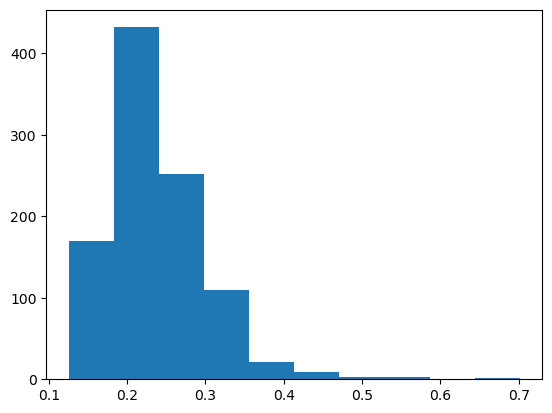

In [27]:
plt.hist(np.sqrt(np.linalg.inv(Ihs_dth)[:,-1,-1]))

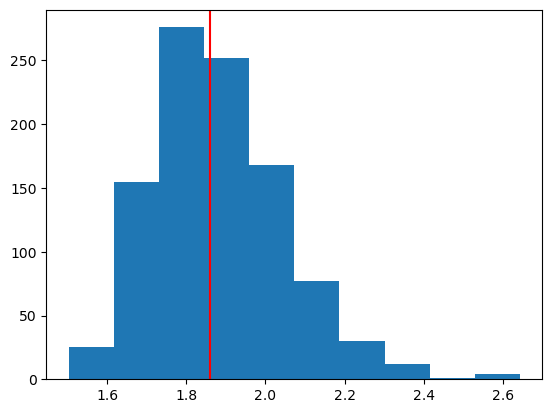

In [33]:
plt.hist(bsim[:,-1,-1])
plt.axvline(x = bmle[-1], c='red')

(array([  6.,  15.,  50., 120., 216., 244., 209., 110.,  24.,   6.]),
 array([-2.40998552, -1.96624602, -1.52250652, -1.07876701, -0.63502751,
        -0.19128801,  0.25245149,  0.69619099,  1.13993049,  1.58367   ,
         2.0274095 ]),
 <BarContainer object of 10 artists>)

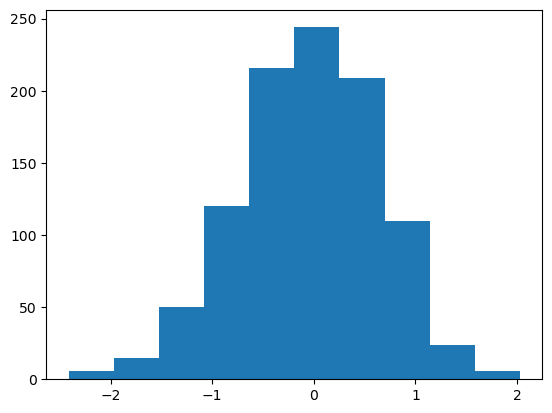

In [13]:
plt.hist(Ts_dth)

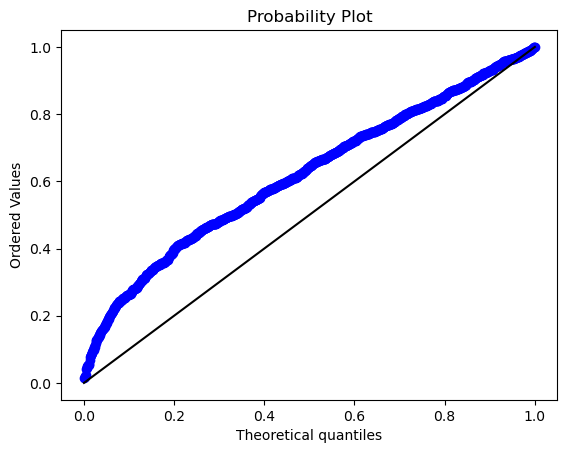

In [14]:
stats.probplot(ps_dth, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [15]:
np.mean(np.abs(Ts_dth) < stats.norm.ppf(0.975))

0.993

# 6. Sandwich estimator coverage test

In [16]:
L_HAC = np.floor(4* (T/100)**(2/9))

In [17]:
w_HAC = np.maximum(1 - np.abs(np.arange(T)[:,None] - np.arange(T))/L_HAC, 0)

In [18]:
Ihs_sdw = np.zeros([num_sim, 2+d, 2+d])
Ts_sdw = np.zeros(num_sim)
ps_sdw = np.zeros(num_sim)

In [19]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    shat_eps = ssim_eps[iter_sim,-1]
    mhat_0 = msim_0[iter_sim,-1]
    bhat = bsim[iter_sim,-1,:]
    Y_data = Ys_sim[iter_sim]
    
    Rhat = np.zeros(T+T0)
    d1Rh = np.zeros([d, T+T0])
    d2Rh = np.zeros([d, d, T+T0])
    
    for t in np.arange(T+T0):
        o = np.exp(bhat @ A[t])
        p = 1 / (1 + o)
        q = o / (1 + o)

        Rhat[t] = K * p
        d1Rh[:,t] = - K * p * q * A[t]
        d2Rh[:,:,t] = K * p * q * (q - p) * (A[t,:,None] * A[t])
        
    Pi = alpha * np.concatenate([[0],pi])[np.maximum(0, T0 + np.arange(T)[:,None] - np.arange(T+T0))]
    G = Rhat[:,None] * np.concatenate([[0],g])[np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    d1G = d1Rh[:,:,None] * np.concatenate([[0],g])[
            np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    d2G = d2Rh[...,None] * np.concatenate([[0],g])[
            np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    
    inv_ImG = la.inv(np.eye(T+T0)-G)
    Pi_inv_ImG = Pi @ inv_ImG
    
    EY = mhat_0 * Pi_inv_ImG[:,0]
    d1EY = mhat_0 * (Pi_inv_ImG @ (d1G @ inv_ImG[:,:1]))[...,0]
    d2EY = mhat_0 * (Pi_inv_ImG @ (
        d1G[:,None] @ inv_ImG @ d1G @ inv_ImG[:,:1]
        + d1G @ inv_ImG @ d1G[:,None] @ inv_ImG[:,:1]
        + d2G @ inv_ImG[:,:1]))[...,0]
    
    dlt_dm = Pi_inv_ImG[:,0] * (Y_data - EY) / smle_eps**2
    dlt_dsp = - 1 / smle_eps + (Y_data - EY)**2 / smle_eps**3
    dlt_db = d1EY * (Y_data - EY) / smle_eps**2
    
    dlt_dth = np.concatenate([np.array([dlt_dm, dlt_dsp]), dlt_db], 0)
    VEdl = dlt_dth @ w_HAC @ dlt_dth.T

    Ihs_sdw[iter_sim] = Ihs_dth[iter_sim] @ la.inv(VEdl) @ Ihs_dth[iter_sim]
    Ts_sdw[iter_sim] = (bhat[1]-bmle[1])/np.sqrt(la.inv(Ihs_sdw[iter_sim])[-1,-1])
    ps_sdw[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_sdw[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.002584 sec.
2-th simulation finished, 0.013836 sec.
3-th simulation finished, 0.004610 sec.
4-th simulation finished, 0.005239 sec.
5-th simulation finished, 0.004503 sec.
6-th simulation finished, 0.006677 sec.
7-th simulation finished, 0.007279 sec.
8-th simulation finished, 0.006962 sec.
9-th simulation finished, 0.005199 sec.
10-th simulation finished, 0.006505 sec.
11-th simulation finished, 0.005203 sec.
12-th simulation finished, 0.006050 sec.
13-th simulation finished, 0.004361 sec.
14-th simulation finished, 0.006509 sec.
15-th simulation finished, 0.006138 sec.
16-th simulation finished, 0.011017 sec.
17-th simulation finished, 0.010620 sec.
18-th simulation finished, 0.011893 sec.
19-th simulation finished, 0.013817 sec.
20-th simulation finished, 0.004053 sec.
21-th simulation finished, 0.004115 sec.
22-th simulation finished, 0.004220 sec.
23-th simulation finished, 0.005861 sec.
24-th simulation finished, 0.004023 sec.
25-th simulation finished

222-th simulation finished, 0.006419 sec.
223-th simulation finished, 0.043945 sec.
224-th simulation finished, 0.006959 sec.
225-th simulation finished, 0.004227 sec.
226-th simulation finished, 0.003203 sec.
227-th simulation finished, 0.004446 sec.
228-th simulation finished, 0.005257 sec.
229-th simulation finished, 0.004662 sec.
230-th simulation finished, 0.011480 sec.
231-th simulation finished, 0.004943 sec.
232-th simulation finished, 0.003950 sec.
233-th simulation finished, 0.004923 sec.
234-th simulation finished, 0.002668 sec.
235-th simulation finished, 0.010469 sec.
236-th simulation finished, 0.005028 sec.
237-th simulation finished, 0.005860 sec.
238-th simulation finished, 0.005222 sec.
239-th simulation finished, 0.004191 sec.
240-th simulation finished, 0.002939 sec.
241-th simulation finished, 0.007852 sec.
242-th simulation finished, 0.003995 sec.
243-th simulation finished, 0.004441 sec.
244-th simulation finished, 0.003860 sec.
245-th simulation finished, 0.0072

439-th simulation finished, 0.004970 sec.
440-th simulation finished, 0.010138 sec.
441-th simulation finished, 0.009150 sec.
442-th simulation finished, 0.006653 sec.
443-th simulation finished, 0.016536 sec.
444-th simulation finished, 0.005354 sec.
445-th simulation finished, 0.011813 sec.
446-th simulation finished, 0.006379 sec.
447-th simulation finished, 0.009223 sec.
448-th simulation finished, 0.003917 sec.
449-th simulation finished, 0.002493 sec.
450-th simulation finished, 0.005098 sec.
451-th simulation finished, 0.005187 sec.
452-th simulation finished, 0.007917 sec.
453-th simulation finished, 0.004221 sec.
454-th simulation finished, 0.004997 sec.
455-th simulation finished, 0.004632 sec.
456-th simulation finished, 0.002583 sec.
457-th simulation finished, 0.004523 sec.
458-th simulation finished, 0.004735 sec.
459-th simulation finished, 0.006282 sec.
460-th simulation finished, 0.002386 sec.
461-th simulation finished, 0.004861 sec.
462-th simulation finished, 0.0051

666-th simulation finished, 0.014449 sec.
667-th simulation finished, 0.003529 sec.
668-th simulation finished, 0.004391 sec.
669-th simulation finished, 0.004212 sec.
670-th simulation finished, 0.004802 sec.
671-th simulation finished, 0.003759 sec.
672-th simulation finished, 0.005001 sec.
673-th simulation finished, 0.004200 sec.
674-th simulation finished, 0.004161 sec.
675-th simulation finished, 0.006354 sec.
676-th simulation finished, 0.008528 sec.
677-th simulation finished, 0.004248 sec.
678-th simulation finished, 0.007814 sec.
679-th simulation finished, 0.026404 sec.
680-th simulation finished, 0.003951 sec.
681-th simulation finished, 0.004739 sec.
682-th simulation finished, 0.006410 sec.
683-th simulation finished, 0.006282 sec.
684-th simulation finished, 0.005629 sec.
685-th simulation finished, 0.003976 sec.
686-th simulation finished, 0.005820 sec.
687-th simulation finished, 0.004398 sec.
688-th simulation finished, 0.005865 sec.
689-th simulation finished, 0.0043

898-th simulation finished, 0.023704 sec.
899-th simulation finished, 0.008201 sec.
900-th simulation finished, 0.004899 sec.
901-th simulation finished, 0.010030 sec.
902-th simulation finished, 0.005693 sec.
903-th simulation finished, 0.008421 sec.
904-th simulation finished, 0.008034 sec.
905-th simulation finished, 0.008688 sec.
906-th simulation finished, 0.009219 sec.
907-th simulation finished, 0.004793 sec.
908-th simulation finished, 0.005034 sec.
909-th simulation finished, 0.004314 sec.
910-th simulation finished, 0.004015 sec.
911-th simulation finished, 0.004209 sec.
912-th simulation finished, 0.007031 sec.
913-th simulation finished, 0.002508 sec.
914-th simulation finished, 0.002561 sec.
915-th simulation finished, 0.004615 sec.
916-th simulation finished, 0.004073 sec.
917-th simulation finished, 0.004299 sec.
918-th simulation finished, 0.004120 sec.
919-th simulation finished, 0.005177 sec.
920-th simulation finished, 0.003898 sec.
921-th simulation finished, 0.0025

(array([ 10.,  17.,  37., 146., 364., 312.,  88.,  20.,   5.,   1.]),
 array([-5.96018118, -4.72759171, -3.49500224, -2.26241277, -1.0298233 ,
         0.20276616,  1.43535563,  2.6679451 ,  3.90053457,  5.13312404,
         6.36571351]),
 <BarContainer object of 10 artists>)

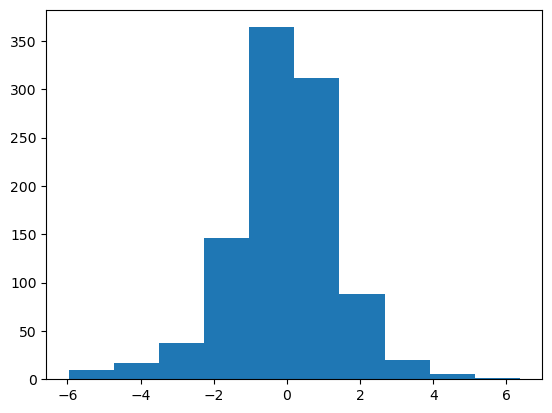

In [20]:
plt.hist(Ts_sdw)

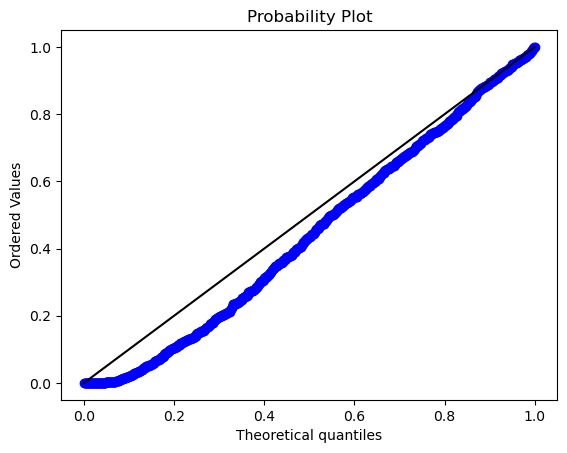

In [21]:
stats.probplot(ps_sdw, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [22]:
np.mean(np.abs(Ts_sdw) < stats.norm.ppf(0.975))

0.859